<a href="https://colab.research.google.com/github/Shirshadas24/Deep-Learning-notebooks/blob/main/Admission_predict_keras_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df.columns=['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']

In [ ]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
X = df.drop(columns=['Chance_of_Admit'])
y = df['Chance_of_Admit'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
X_train_trf

array([[ 0.18702149,  0.42056561, -0.09750979, ..., -1.08116764,
         0.28993359, -1.12672248],
       [ 0.70368516,  0.58488917, -0.09750979, ...,  0.02594802,
         0.14151398, -1.12672248],
       [ 0.2731321 , -0.72969931, -0.09750979, ..., -0.52760981,
        -1.5075928 , -1.12672248],
       ...,
       [-2.31018627, -0.56537575,  0.76924386, ..., -1.08116764,
        -1.90337843, -1.12672248],
       [ 1.90923373,  1.89947766,  1.63599751, ...,  0.57950586,
         1.79062075, -1.12672248],
       [ 0.44535332,  0.42056561,  0.76924386, ...,  1.68662152,
         0.85062989,  0.88753   ]])

In [ ]:
X_test_trf


array([[-0.67408464, -0.40105219,  1.63599751,  0.08158962,  0.02594802,
        -0.08936097, -1.12672248],
       [-0.76019525,  0.42056561,  0.76924386,  0.08158962, -0.52760981,
        -0.0233967 , -1.12672248],
       [ 0.78979577,  0.42056561, -0.09750979,  0.08158962,  0.02594802,
         0.24046038,  0.88753   ],
       [-0.93241647, -0.40105219, -0.96426343, -0.40190441, -1.08116764,
        -0.58409301, -1.12672248],
       [-0.07131035, -0.40105219, -0.09750979, -0.40190441,  0.02594802,
         0.19098718, -1.12672248],
       [-0.67408464, -1.22267   , -0.96426343, -0.40190441, -0.52760981,
        -0.84795009, -1.12672248],
       [-0.4157528 ,  0.25624205, -0.09750979, -0.40190441, -0.52760981,
         0.12502291, -1.12672248],
       [-0.4157528 , -0.56537575, -0.09750979,  0.08158962,  0.57950586,
        -0.86444116, -1.12672248],
       [ 1.30645944,  1.7351541 , -0.96426343,  1.04857766,  0.02594802,
         1.22992445,  0.88753   ],
       [ 1.22034883,  1.5708

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#DROPOUT
# from tensorflow.keras.layers import Dropout
# model = Sequential()
# model.add(Dense(7, activation='relu', input_dim=7))
# model.add(Dropout(0.2))  # Drop 20% of neurons to prevent overfitting
# model.add(Dense(7, activation='relu'))
# model.add(Dense(1, activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mse'])
from tensorflow.keras.optimizers import Adam
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mse'])

In [ ]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_data=(X_test_trf,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2410 - mse: 0.2410 - val_loss: 0.2139 - val_mse: 0.2139
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1781 - mse: 0.1781 - val_loss: 0.1504 - val_mse: 0.1504
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1225 - mse: 0.1225 - val_loss: 0.1020 - val_mse: 0.1020
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0925 - mse: 0.0925 - val_loss: 0.0674 - val_mse: 0.0674
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [ ]:
# #early stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# history = model.fit(X_train_trf, y_train, epochs=100, validation_data=(X_test_trf, y_test), callbacks=[early_stop])

In [ ]:
y_pred=model.predict(X_test_trf)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)# lower mse better model performance mse=[summation((ytrue-ypred)^2)]/n


0.006105212352274326

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6639483911886218

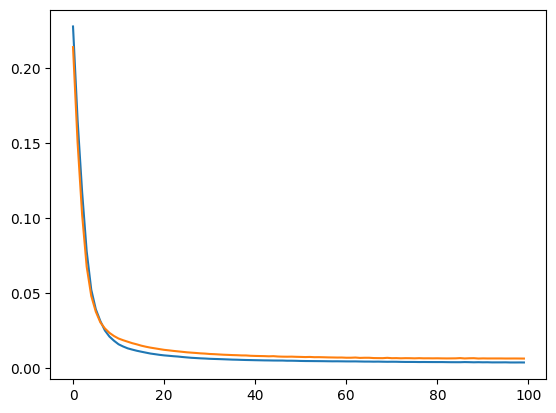

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

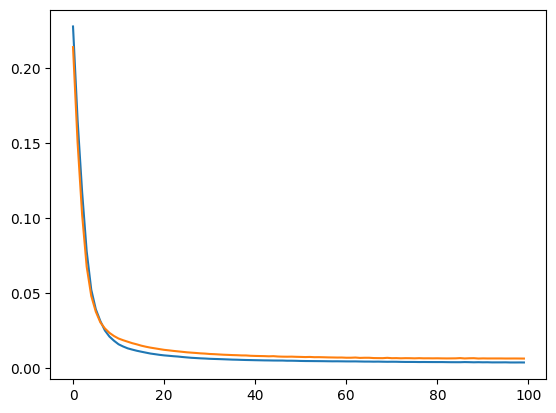

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])